In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams.update({'font.size': 16})

# Notes on THE AVERAGE STAR FORMATION HISTORIES OF GALAXIES IN DARK MATTER HALOS FROM Z = 0 − 8 by Behroozi and Wechsler

## Primary conclusions: 
- Halos near $10^{12} M_\odot$ are most efficient at forming stars at all redshifts
- Baryon conversion efficiency drops after $z \sim 2.5$, consistent with cold-mode accretion
- Intracluster light for massive galaxies is expected to  be significant out to $z \sim 1-1.5$
- dwarf galaxies at low redshifts have higher stellar mass to halo mass ratios than previous expectations and form later than in most theoretical models

## Look these up
- Cold-mode accretion
- Intracluster light
- Declining Tau Model
- Peak progenitor virial mass

## Definitions of important quantities
- Halo Mass is defined in Bryan & Norman 1998 ($\Delta_c = 200$) for central galaxies, peak progenitor virial mass for satellite galaxies

# Parameterization of the SMHM relation

$$
\log_{10}(M_*(M_h)) = \log_{10}(\epsilon M_1)+f \left( \log_{10} \left(\frac{M_h}{M_1} \right) \right) -f(0)
$$

where 
$$
f(x) = -\log_{10}(10^{\alpha x}+1) + \delta \frac{(log_{10}(1+\exp(x)))^{\gamma}}{1+\exp(10^{-x})}
$$

Exponential cutoff of evolution of $M_*(M_h)$ with scale factor
$$
\nu(a) = \exp(-4a^2) 
$$

Characteristic halo mass
$$
\log_{10}(M_1) = M_{1,0} + (M_{1,a}(a-1) + M_{1,z}z)\nu
$$

Characteristic stellar mass to halo mass ratio
$$
\log_{10}(\epsilon) = \epsilon_0 + (\epsilon_a(a-1) + \epsilon_z z)\nu + \epsilon_{a,2}(a-1)
$$

Faint-end slope of SMHM relation
$$
\alpha = \alpha_0 + (\alpha_a(a-1))\nu
$$

Strength of subpower law at massive end of SMHM relation
$$
\delta = \delta_0 + (\delta_a(a-1) + \delta_z z)\nu
$$

Index of subpower law at massive end of SMHM relation
$$
\gamma = \gamma_0 + (\gamma_a(a-1) + \gamma_z z)\nu
$$



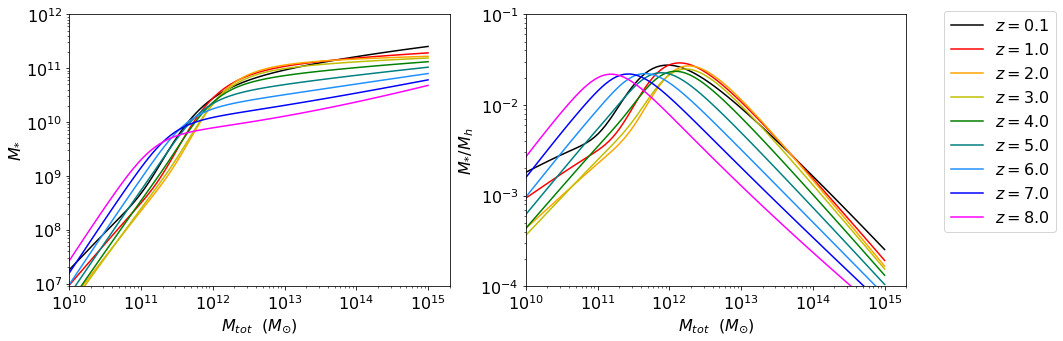

In [9]:

nu = lambda a : np.exp(-4*a*a)

eps0 = -1.777
epsa = -0.006
epsz = -0.000
eps2 = -0.119
eps = lambda z, a: 10**( eps0 + (epsa*(a-1) +(epsz)*z)*nu(a) + eps2*(a-1) )

M10 = 11.514
M1a = -1.793
M1z = -0.251
M_1 = lambda z, a: 10**( M10 + (M1a*(a-1) + M1z*z)*nu(a) )

alph0 = -1.412
alpha = 0.731
alph = lambda a: alph0 + alpha*(a-1)*nu(a)

delt0 = 3.508
delta = 2.608
deltz = -0.043
delt = lambda z, a: delt0 + (delta*(a-1) + deltz*z)*nu(a) 

gamm0 = 0.316
gamma = 1.319
gammz = 0.279
gamm = lambda z, a: gamm0 + (gamma*(a-1) + gammz*z)*nu(a) 

def SM(Mh, z, a):
    E = eps(z,a)
    M = M_1(z,a)
    A = alph(a)
    D = delt(z,a)
    G = gamm(z,a)
    
    f = lambda x : -np.log10(10**(A*x)+1) + D * (np.log10(1+np.exp(x)))**G / (1+np.exp(10**(-x)))
    
    M_s = 10**( np.log10(E*M) + f(np.log10(Mh/M)) - f(0) )
    return M_s


colors    = ['k','r','orange','y','g','teal','dodgerblue','blue','magenta']
redshifts = np.array([0.1,1.,2.,3.,4.,5.,6.,7.,8.])
a = 1/(1+redshifts)
halo_masses = np.logspace(10, 15, 100)

fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(0, len(redshifts)):
    z = redshifts[i]
    sm = SM(halo_masses, z, a[i])
    smf = sm/halo_masses
    ax[0].loglog(halo_masses, sm, label=f'$z={z}$', c=colors[i])
    ax[1].loglog(halo_masses, smf, label=f'$z={z}$', c=colors[i])

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[0].set_xlabel("$M_{tot}$  ($M_{\odot}$)")
ax[1].set_xlabel("$M_{tot}$  ($M_{\odot}$)")
ax[0].set_ylabel("$M_{*}$")
ax[1].set_ylabel("$M_{*}/M_h$")
ax[0].set_xlim((1e10, 2e15))
ax[1].set_xlim((1e10, 2e15))
ax[0].set_ylim((9e6, 1e12))
ax[1].set_ylim((1e-4, 1e-1))
ax[1].legend(loc=(1.1, 0.2))
plt.show()
    


Behroozi seems to have not included a value for the scaling parameter $a$ so it doesn't seem possible to recreate the exact plot from his paper. He has, however, provided the actual data used to create the plot. Comparing these results to the Behroozi plots, it's likely that there's a different scaling parameter value for each redshift as well.

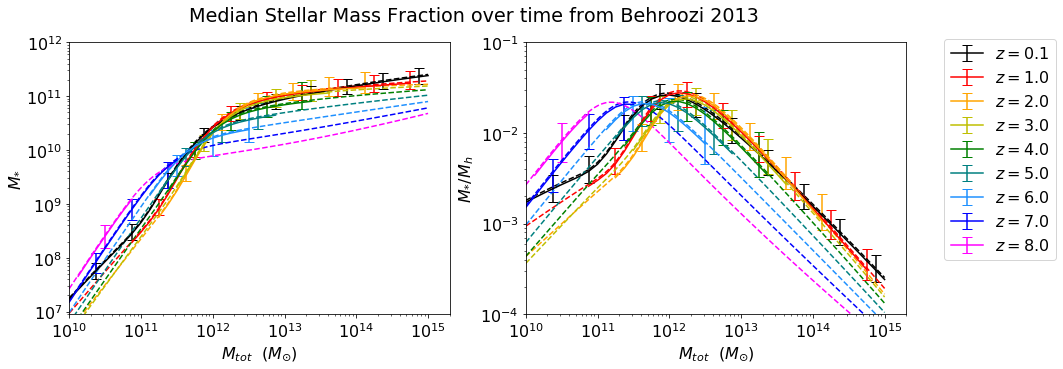

In [15]:
path = 'Behroozi_2013_data/release-sfh_z0_z8_052913/smmr/'
filefmt = 'c_smmr_z%s_red_all_smf_m1p1s1_bolshoi_fullcosmos_ms.dat'
redshifts = ['0.10','1.00','2.00','3.00','4.00','5.00','6.00','7.00','8.00']
colors    = ['k','r','orange','y','g','teal','dodgerblue','blue','magenta']

fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(0, len(redshifts)):
    z = redshifts[i]
    halo_mass, smf, err_up, err_dn = np.loadtxt(path+filefmt%(z), unpack=True)
    
    z = float(z)
    # generate stellar mass values
    sm = 10**(smf+halo_mass)
    
    # fix error values so matplotlib can deal with them
    err_up = 10**(smf + err_up) - 10**(smf) 
    err_dn = 10**(smf) - 10**(smf - err_dn) 
    
    err_up[::2]=np.nan
    err_dn[::2]=np.nan
    err_up[1::4]=np.nan
    err_dn[1::4]=np.nan
    
    # translate values from log space to actual values
    smf = 10**(smf)
    halo_mass = 10**(halo_mass)
    
    sm_fit = SM(halo_masses, z, a[i])
    smf_fit = sm_fit/halo_masses
    ax[0].loglog(halo_masses, sm_fit, c=colors[i], linestyle='dashed')
    ax[1].loglog(halo_masses, smf_fit, c=colors[i], linestyle='dashed')
    
    ax[0].errorbar(halo_mass, sm, yerr=np.array([err_dn*(halo_mass), err_up*(halo_mass)]), c=colors[i], capsize=5, label=f'$z={z}$')
    ax[1].errorbar(halo_mass, smf, yerr=np.array([err_dn, err_up]), c=colors[i], capsize=5, label=f'$z={z}$')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[0].set_xlabel("$M_{tot}$  ($M_{\odot}$)")
ax[1].set_xlabel("$M_{tot}$  ($M_{\odot}$)")
ax[0].set_ylabel("$M_{*}$")
ax[1].set_ylabel("$M_{*}/M_h$")
ax[0].set_xlim((1e10, 2e15))
ax[1].set_xlim((1e10, 2e15))
ax[0].set_ylim((9e6, 1e12))
ax[1].set_ylim((1e-4, 1e-1))
ax[1].legend(loc=(1.1, 0.2))
plt.suptitle('Median Stellar Mass Fraction over time from Behroozi 2013')
plt.show()